<a href="https://colab.research.google.com/github/vbang247/python/blob/main/MSIS522_Assignment3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

## Problem 1: Segment Customers

The problem that we are going to solve in this assignment is to segment customers into different groups based on their shopping trends.

In [45]:
# import packages
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_colwidth',0)

### Load data

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [46]:
# load the data
shopping_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/shopping_data.csv')
shopping_data.rename(
    columns={
        'CustomerID': 'customer_id',
        'Genre': 'genre',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    },
    inplace=True
)
display(shopping_data.head())
X = np.array(shopping_data[['annual_income', 'spending_score']])

# TODO: retain only anual_income and spending_score for clustering

,customer_id,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
X = shopping_data[['annual_income','spending_score']].to_numpy()

### Hierarchical Clustering
First, we will apply hierarchical clustering and use dendrogram to help find the number of clusters within the data.

**TODO: Use dendrogram to plot hierarchical clustering and find the number of clusters that makes sense.**

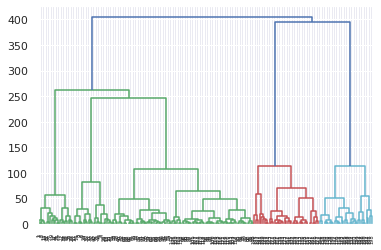

In [48]:
from traitlets.traitlets import link
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc

# TODO
dend = shc.dendrogram(shc.linkage(X, method='ward'))

**TODO: Apply hierarchical clustering based on the number of clusters you pick from the dendrogram, and visualize the results using scatterplot.**

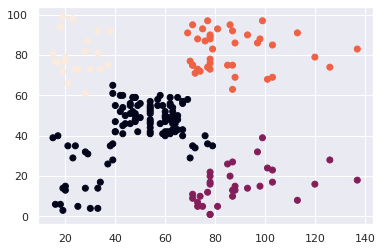

In [49]:
from traitlets.traitlets import link
from sklearn.cluster import AgglomerativeClustering

# TODO
cluster = AgglomerativeClustering(n_clusters=4, linkage="ward")
y_agglomerative = cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_agglomerative)

### K-means Clustering
Then, we will apply k-means to the same data and visualize the results.

**TODO: Vary the number of K from 2 to 10 and plot the Sum of Squared Error (SSE) as K increases and pick up the value of K that makes sense.**

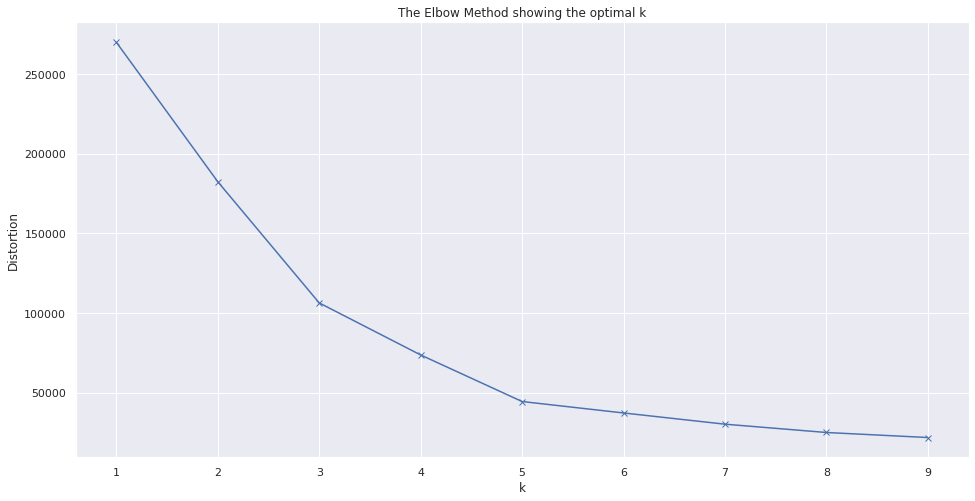

In [50]:
# TODO
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(shopping_data[['annual_income', 'spending_score']])
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**TODO: Cluster the data using K-means based on the pre-defined value of K from the previous step and and visualize the results using scatterplot. **

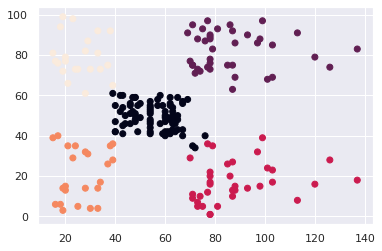

In [51]:
# TODO
kModel = KMeans(n_clusters=5)
kModel.fit(shopping_data[['annual_income', 'spending_score']])
y_agglomerative = kModel.predict(shopping_data[['annual_income', 'spending_score']])
plt.scatter(shopping_data['annual_income'], shopping_data['spending_score'], c=y_agglomerative)

## Problem 2: Clustering (Manually)

For the following dataset, perform the clustering “by hand”:

17 28 50 60 80 89 150 167 171 189 
1. 	Use the K-means algorithm with K= 3 to cluster the data
2. 	Use hierarchical agglomerative clustering with single linkage to cluster the data
3. 	Use hierarchical agglomerative clustering with complete linkage to cluster the data
4. 	For K-means What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189

**1. Use the K-means algorithm with K= 3 to cluster the data**

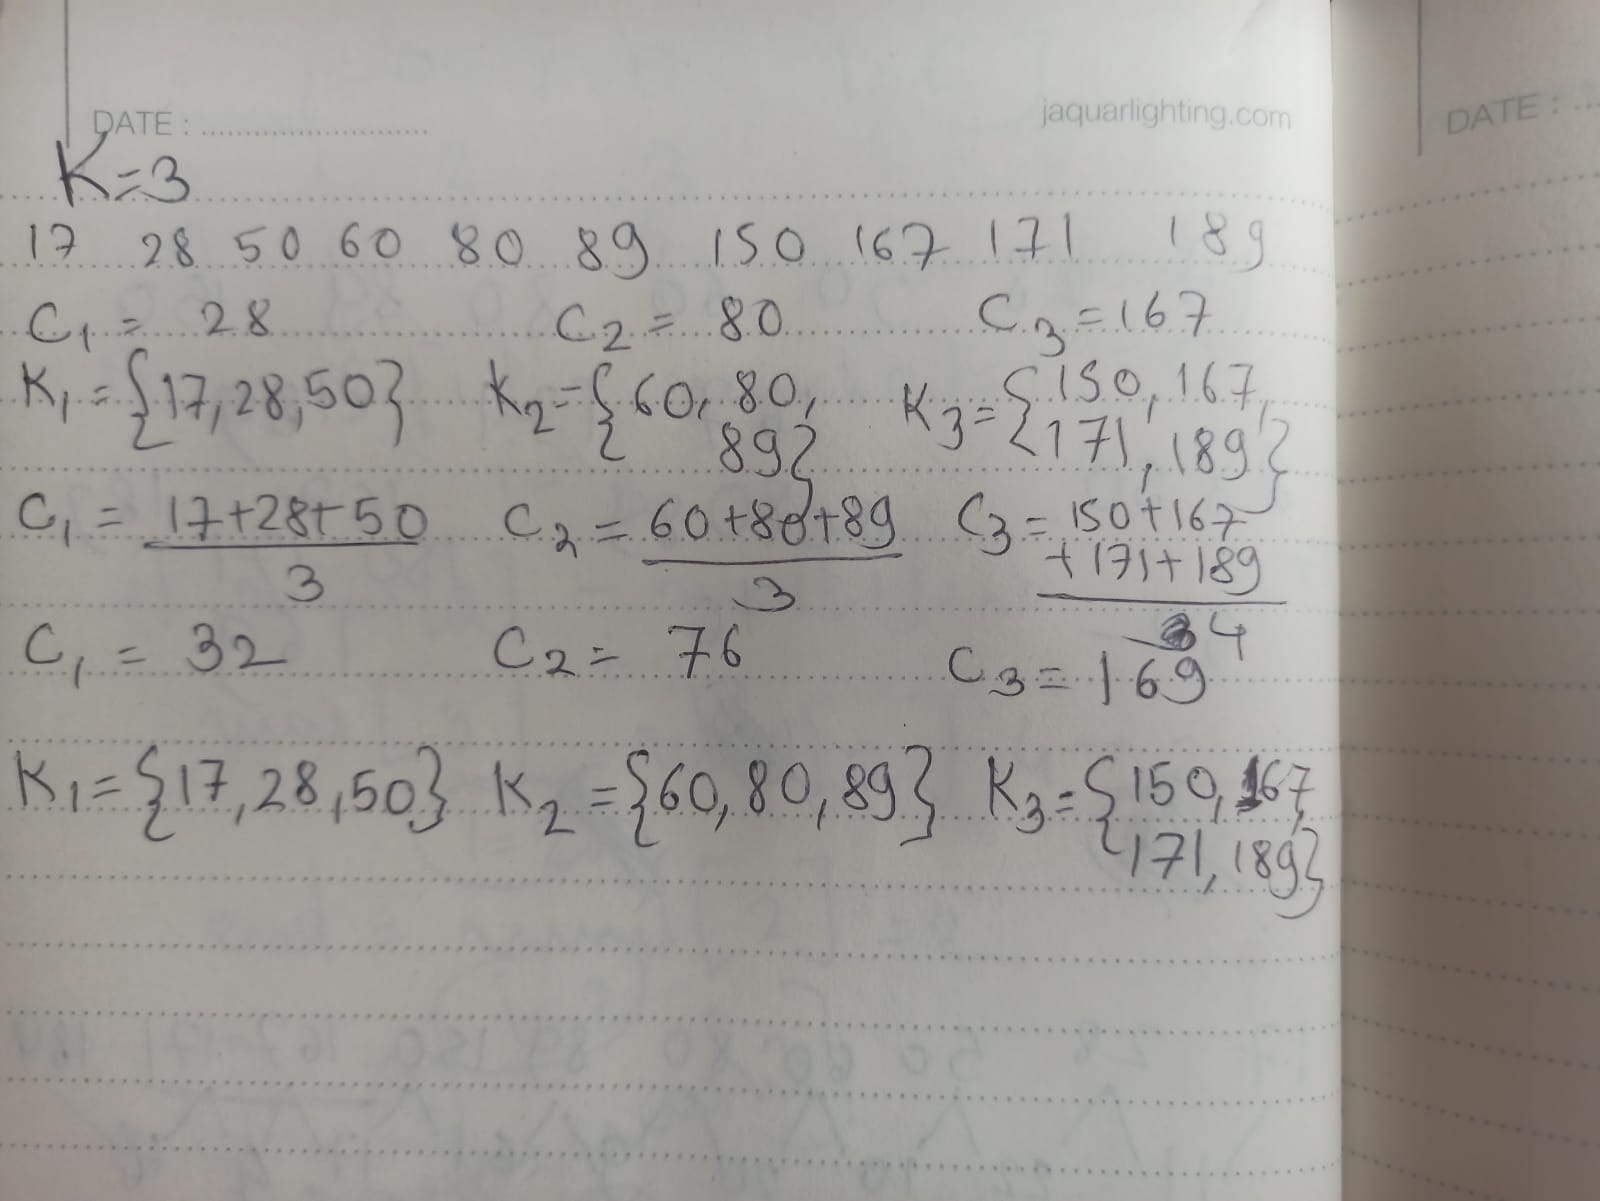

In [52]:
# import matplotlib.image as mpimg
# img = mpimg.imread('2_1.jpeg')
# imgplot = plt.imshow(img)
# plt.show()
from IPython.display import display, Image
display(Image(filename='2_1.jpeg',width=500))

**2. Use hierarchical agglomerative clustering with single linkage to cluster the data**

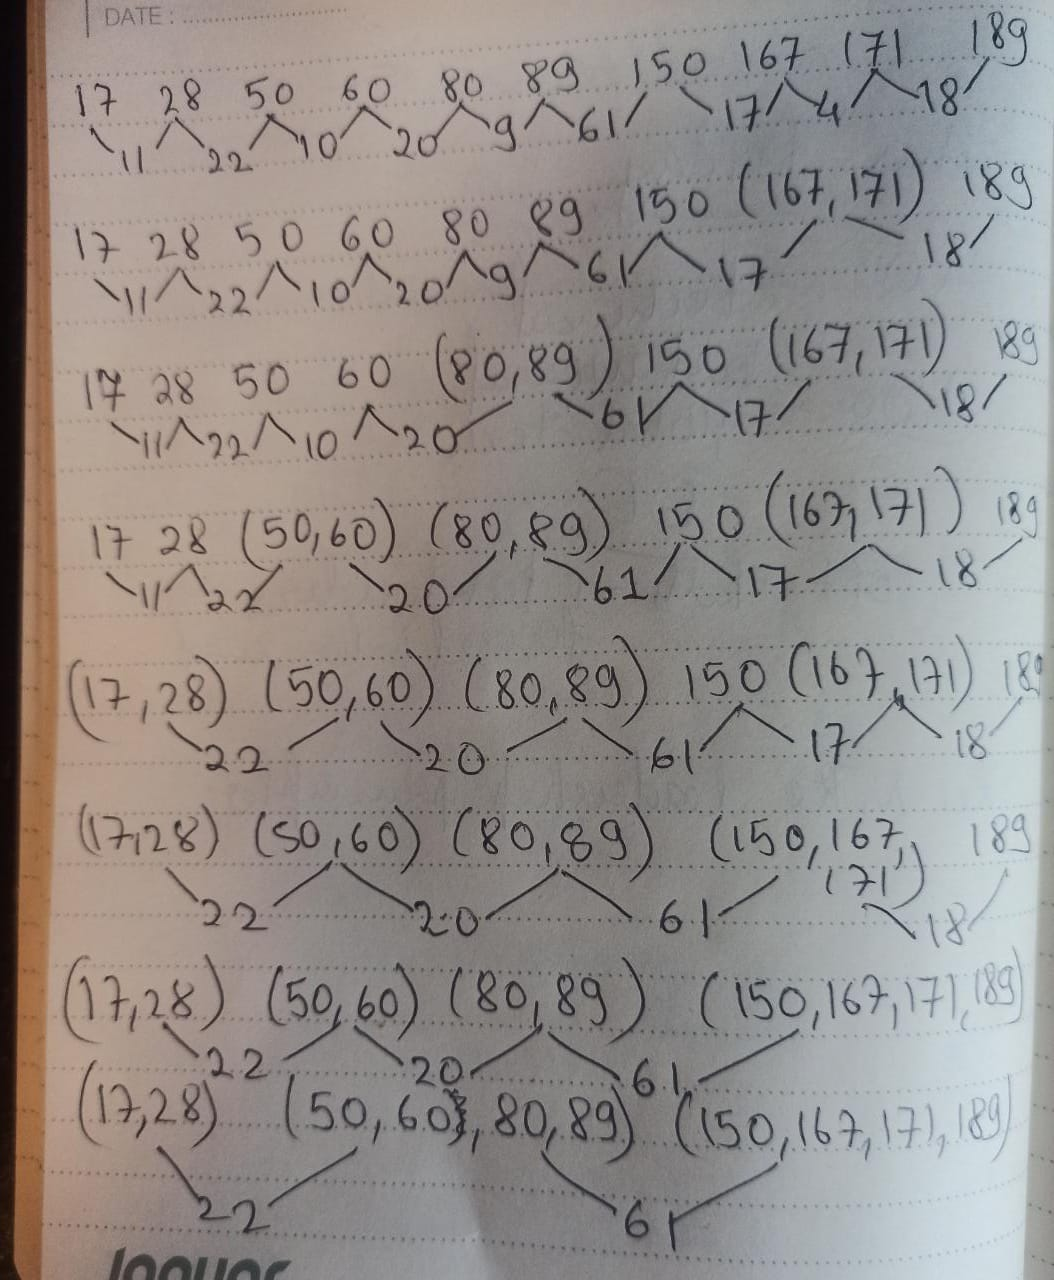

In [53]:
display(Image(filename='2_2.jpeg',width=500, height=500))

**3. Use hierarchical agglomerative clustering with complete linkage to cluster the data**

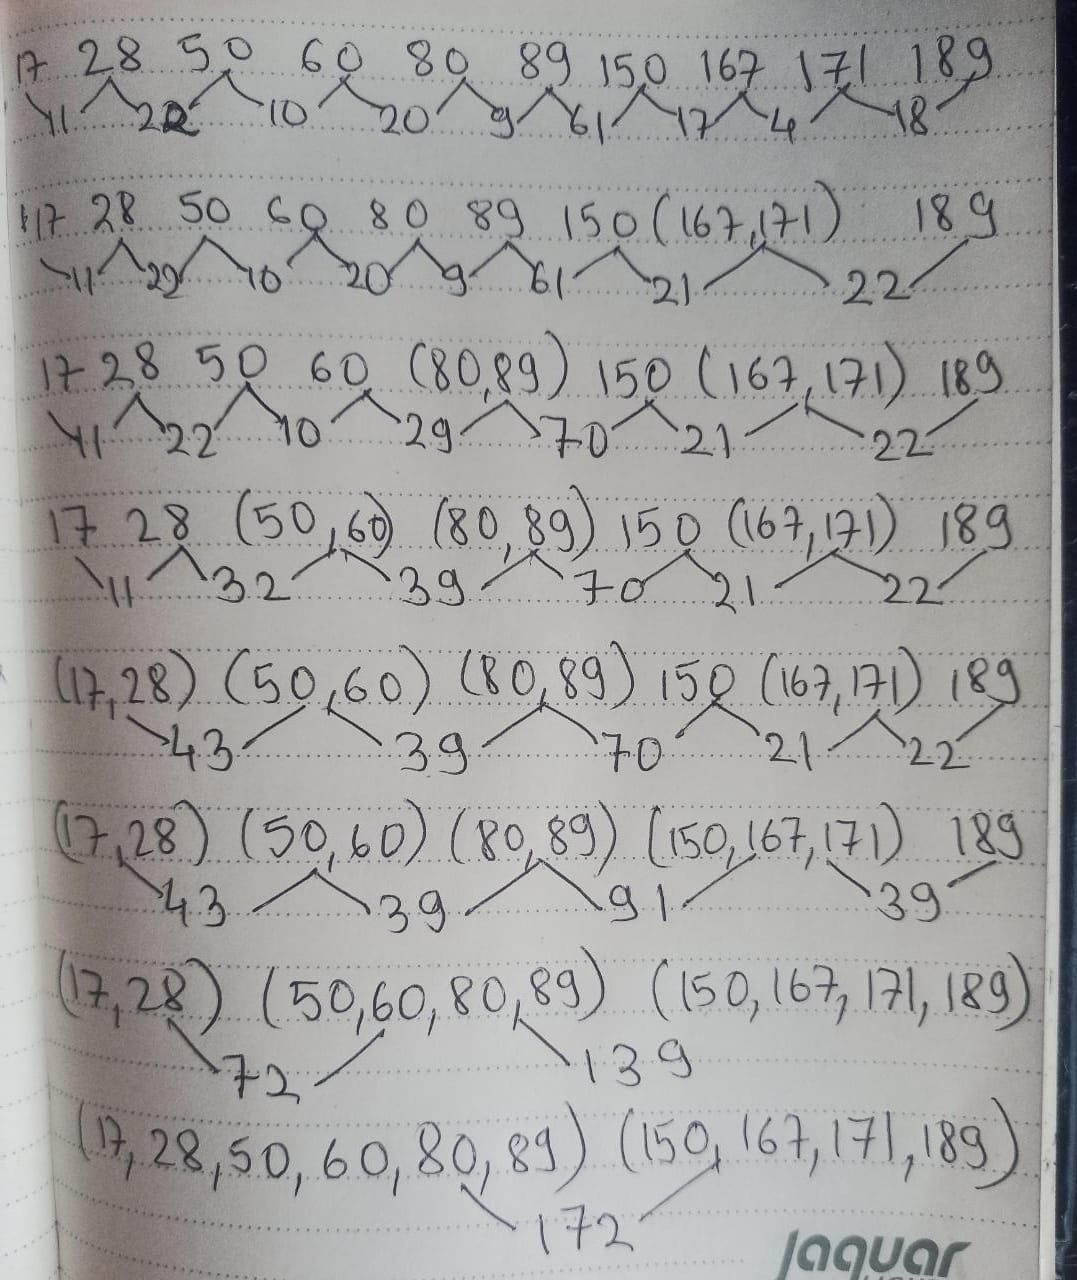

In [54]:
display(Image(filename='2_3.jpeg',width=500, height=500))

 **4. For K-means What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189**

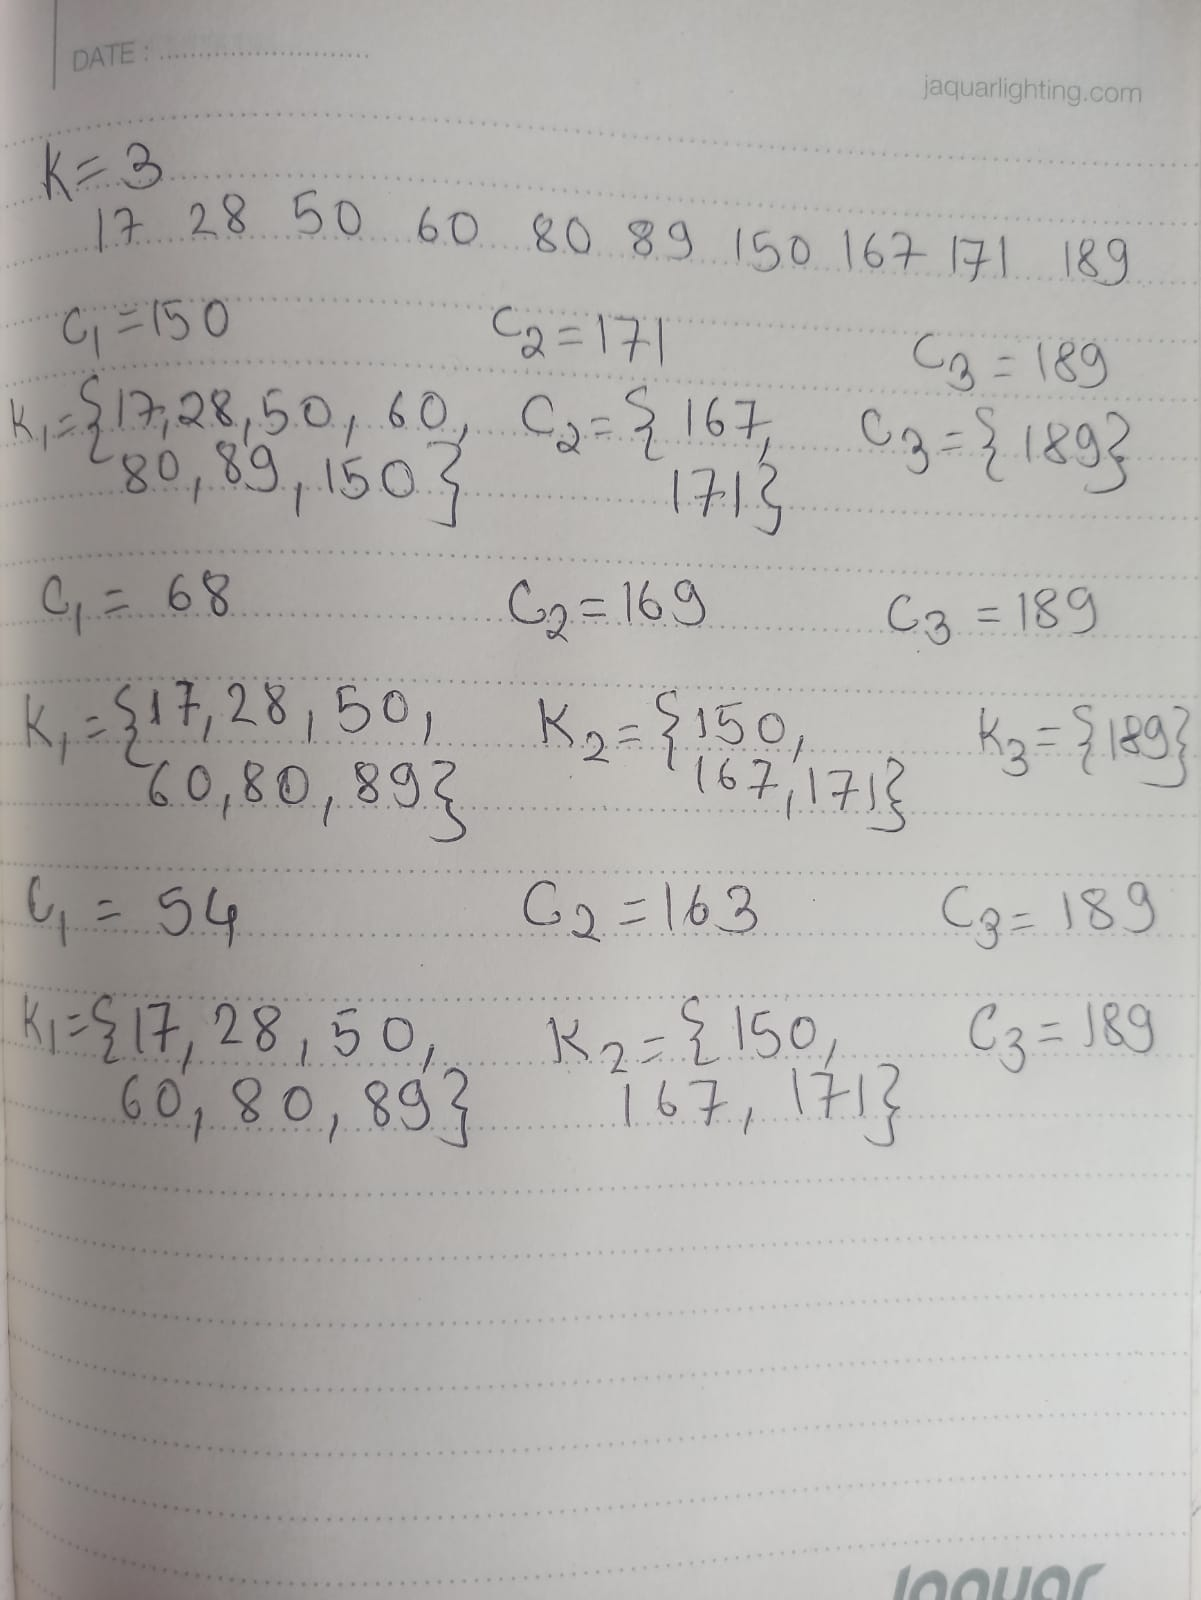

In [55]:
display(Image(filename='2_4.jpeg',width=500, height=500))

## Bonus points
Use the dataset of accepted papers at the AAAI 2014 conference to find clusters of papers using K-Means. You can use paper title or abstract to build your features using [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model).

1. Vary the number of K from 2 to 6 and show if the results vary and assess the clusters obtained.

2. Make a case regarding which clusters ‘make sense’ e.g., is there a cluster were papers on reinforcement learning are together vs. another cluster which has papers on deep learning.

# **I have listed below centers for each cluster as well as titles belonging to that cluster while varying k from 2 to 6.**

In [56]:
# Load the Relevant libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import sklearn as sk

# URL for the AAAI (UW Repository)
aaai_data = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/AAAI2014AcceptedPapers.csv")

# TODO
# aaai_data.head()

In [57]:
from pandas.core.frame import DataFrame
# true_k = 6
# model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
# model.fit(X)
# print("Top terms per cluster:")
# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# big_l = {}
for k in range(2,7):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(aaai_data['title'])
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    model.fit(X)
    # print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    # print(order_centroids)
    # print(k)
    terms = vectorizer.get_feature_names()
    big_l = {}
    for i in range(k):
      short_l = []
      for ind in order_centroids[i, :10]:
          short_l.append(terms[ind])
      big_l["Cluster" + str(i+1)] = short_l
    df = pd.DataFrame(big_l)
    clusters = df.columns.tolist()
    print(df.head())
    print("\n")
    for c in clusters:
      print("Titles in "+c)
      for j in df[c]:
        new_t = aaai_data[aaai_data['title'].str.contains(j)]['title'].tolist()
        if len(new_t) > 0:
          print(new_t) 
      print("\n")

   Cluster1  Cluster2
0  social    learning
1  search    based   
2  using     multi   
3  linear    model   
4  networks  sparse  


Titles in Cluster1
['Extracting Keyphrases from Research Papers using Citation Networks']
['Solving Uncertain MDPs by Reusing State Information and Plans', 'Robust Visual Robot Localization Across Seasons using Network Flows', 'Fast consistency checking of very large real-world RCC-8 constraint  networks using graph partitioning', 'Extracting Keyphrases from Research Papers using Citation Networks', 'Generating Content for Scenario-Based Serious-Games using CrowdSourcing', 'Lifting Relational MAP-LP Relaxations using Permutation Constraint Graphs', 'Structured Possibilistic Planning using Decision Diagrams', 'Programming by Example using Least General Generalizations', 'Maximum Satisfiability using core-guided MaxSAT Resolution', 'Effective Management of Electric Vehicle Storage using Smart Charging', 'GP-Localize: Persistent Mobile Robot Localization us

In [58]:
# for x in clusters:
#   print("Titles in "+x)
#   for j in df[x]:
#     new_t = aaai_data[aaai_data['title'].str.contains(j)]['title'].tolist()
#     if len(new_t) > 0:
#       print(new_t) 
#   print("\n")